In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
batch_size = 32
img_height = 224
img_width = 224
path = "/content/drive/MyDrive/Pothole-Dataset"

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split = 0.14,
    subset = 'training',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split = 0.14,
    subset = 'validation',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

In [ ]:
def Resnet18(input_shape = (224,224,3), classes = 2):
  x_input = tf.keras.layers.Input(input_shape)
  normalization_layer = tf.keras.layers.Rescaling(1./255)(x_input)

  flip = tf.keras.layers.RandomFlip("horizontal_and_vertical")(normalization_layer)
  contrast = tf.keras.layers.RandomContrast(0.2)(flip)

  conv1 = tf.keras.layers.Conv2D(64,7,strides=2,padding='same',activation='relu')(contrast)
  pool_conv1 = tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2,padding='same')(conv1)

  conv2_1 = tf.keras.layers.Conv2D(64,3,strides=1,padding='same',activation='relu')(pool_conv1)
  conv2_2 = tf.keras.layers.Conv2D(64,3,strides=1,padding='same',activation='relu')(conv2_1)

  conv2_add1 = tf.keras.layers.Add()([pool_conv1,conv2_2])

  conv2_3 = tf.keras.layers.Conv2D(64,3,strides=1,padding='same',activation='relu')(conv2_add1)
  conv2_4 = tf.keras.layers.Conv2D(64,3,strides=1,padding='same',activation='relu')(conv2_3)

  conv2_add2 = tf.keras.layers.Add()([conv2_add1,conv2_4])

  conv3_1 = tf.keras.layers.Conv2D(128,3,strides=2,padding='same',activation='relu')(conv2_add2)
  conv3_2 = tf.keras.layers.Conv2D(128,3,strides=1,padding='same',activation='relu')(conv3_1)

  conv3_add1 = tf.keras.layers.Add()(\
        [tf.keras.layers.Conv2D(128,1,strides=2,padding='same',activation='relu')(conv2_add2), \
                                      conv3_2])

  conv3_3 = tf.keras.layers.Conv2D(128,3,strides=1,padding='same',activation='relu')(conv3_add1)
  conv3_4 = tf.keras.layers.Conv2D(128,3,strides=1,padding='same',activation='relu')(conv3_3)

  conv3_add2 = tf.keras.layers.Add()( [conv3_add1, conv3_4])

  conv4_1 = tf.keras.layers.Conv2D(256,3,strides=2,padding='same',activation='relu')(conv3_add2)
  conv4_2 = tf.keras.layers.Conv2D(256,3,strides=1,padding='same',activation='relu')(conv4_1)

  conv4_add1 = tf.keras.layers.Add()(\
        [tf.keras.layers.Conv2D(256,1,strides=2,padding='same',activation='relu')(conv3_add2), \
                                      conv4_2])

  conv4_3 = tf.keras.layers.Conv2D(256,3,strides=1,padding='same',activation='relu')(conv4_add1)
  conv4_4 = tf.keras.layers.Conv2D(256,3,strides=1,padding='same',activation='relu')(conv4_3)

  conv4_add2 = tf.keras.layers.Add()( [conv4_add1, conv4_4])

  conv5_1 = tf.keras.layers.Conv2D(512,3,strides=2,padding='same',activation='relu')(conv4_add2)
  conv5_2 = tf.keras.layers.Conv2D(512,3,strides=1,padding='same',activation='relu')(conv5_1)

  conv5_add1 = tf.keras.layers.Add()(\
        [tf.keras.layers.Conv2D(512,1,strides=2,padding='same',activation='relu')(conv4_add2), \
                                      conv5_2])

  conv5_3 = tf.keras.layers.Conv2D(512,3,strides=1,padding='same',activation='relu')(conv5_add1)
  conv5_4 = tf.keras.layers.Conv2D(512,3,strides=1,padding='same',activation='relu')(conv5_3)

  conv5_add2 = tf.keras.layers.Add()( [conv5_add1, conv5_4])

  final_pooling = tf.keras.layers.AveragePooling2D(pool_size=7)(conv5_add2)

  input_vector = tf.keras.layers.Flatten() (final_pooling)

  hidden_layer = tf.keras.layers.Dense(100, activation='relu') (input_vector)

  outputs = tf.keras.layers.Dense(classes, activation='softmax') (hidden_layer)

  return tf.keras.models.Model(x_input, outputs, name='Resnet18')

resnet = Resnet18()
resnet.summary()


Model: "Resnet18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 random_flip (RandomFlip)    (None, 224, 224, 3)          0         ['rescaling[0][0]']           
                                                                                                  
 random_contrast (RandomCon  (None, 224, 224, 3)          0         ['random_flip[0][0]']         
 trast)                                                                                    

In [ ]:
weigths = resnet.get_weights()

print('From weights:\n')
for var, g in zip(resnet.trainable_variables, weigths):
  print(f'{var.name}, shape: {g.shape}')

From weights:

conv2d/kernel:0, shape: (7, 7, 3, 64)
conv2d/bias:0, shape: (64,)
conv2d_1/kernel:0, shape: (3, 3, 64, 64)
conv2d_1/bias:0, shape: (64,)
conv2d_2/kernel:0, shape: (3, 3, 64, 64)
conv2d_2/bias:0, shape: (64,)
conv2d_3/kernel:0, shape: (3, 3, 64, 64)
conv2d_3/bias:0, shape: (64,)
conv2d_4/kernel:0, shape: (3, 3, 64, 64)
conv2d_4/bias:0, shape: (64,)
conv2d_5/kernel:0, shape: (3, 3, 64, 128)
conv2d_5/bias:0, shape: (128,)
conv2d_7/kernel:0, shape: (1, 1, 64, 128)
conv2d_7/bias:0, shape: (128,)
conv2d_6/kernel:0, shape: (3, 3, 128, 128)
conv2d_6/bias:0, shape: (128,)
conv2d_8/kernel:0, shape: (3, 3, 128, 128)
conv2d_8/bias:0, shape: (128,)
conv2d_9/kernel:0, shape: (3, 3, 128, 128)
conv2d_9/bias:0, shape: (128,)
conv2d_10/kernel:0, shape: (3, 3, 128, 256)
conv2d_10/bias:0, shape: (256,)
conv2d_12/kernel:0, shape: (1, 1, 128, 256)
conv2d_12/bias:0, shape: (256,)
conv2d_11/kernel:0, shape: (3, 3, 256, 256)
conv2d_11/bias:0, shape: (256,)
conv2d_13/kernel:0, shape: (3, 3, 256, 

In [ ]:
#compile the model

resnet.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

#early stopping function
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10, start_from_epoch=15)


In [ ]:
history=resnet.fit(train_ds,
    validation_data = val_ds,
    callbacks=[early],
    epochs = 100)

Epoch 1/100
19/19 [==============================] - 333s 12s/step - loss: 2.1311 - accuracy: 0.5033 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/100
19/19 [==============================] - 178s 9s/step - loss: 0.6945 - accuracy: 0.4901 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/100
19/19 [==============================] - 178s 9s/step - loss: 0.6928 - accuracy: 0.5166 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 4/100
19/19 [==============================] - 180s 9s/step - loss: 0.6940 - accuracy: 0.4818 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 5/100
19/19 [==============================] - 178s 9s/step - loss: 0.6927 - accuracy: 0.5099 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 6/100
19/19 [==============================] - 180s 9s/step - loss: 0.6950 - accuracy: 0.5215 - val_loss: 0.6893 - val_accuracy: 0.5306
Epoch 7/100
19/19 [==============================] - 178s 9s/step - loss: 0.6815 - accuracy: 0.5712 - val_loss: 0.5899 - val_accuracy: 0.7245
Epoch

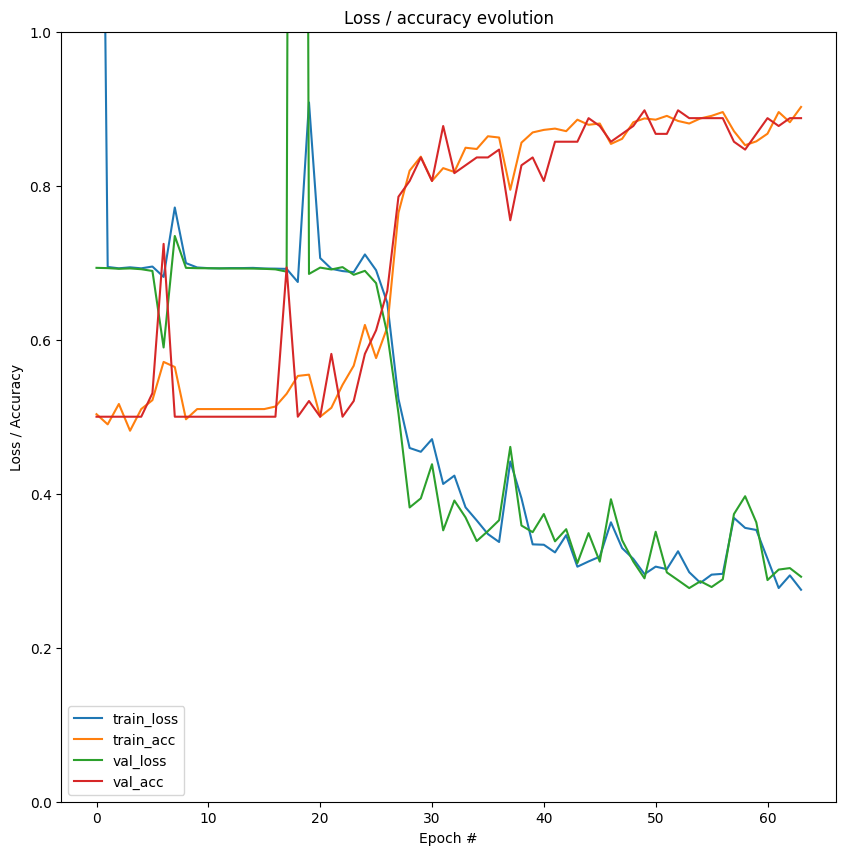

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot( history.history["loss"], label="train_loss")
plt.plot( history.history["accuracy"], label="train_acc")
plt.plot( history.history["val_loss"], label="val_loss")
plt.plot( history.history["val_accuracy"], label="val_acc")
plt.title("Loss / accuracy evolution")
plt.xlabel("Epoch #")
plt.ylabel("Loss / Accuracy")
plt.ylim([0, 1])
leg=plt.legend()


In [ ]:
resnet.save("/content/drive/MyDrive/Models/resnet18_with_data_aug")

In [ ]:
print("Train:")
Train_Evaluation = resnet.evaluate(train_ds, verbose=2)
print("Test:")
Test_Evaluation = resnet.evaluate(val_ds, verbose=2)

Train:
19/19 - 55s - loss: 0.2881 - accuracy: 0.8990 - 55s/epoch - 3s/step
Test:
4/4 - 7s - loss: 0.2922 - accuracy: 0.8878 - 7s/epoch - 2s/step
